In [5]:
import os

import numpy as np
import matplotlib.pyplot as plt

import imutils
import cv2

# Functions

In [6]:
def align_license_plate(license_plate_image):
    
    # Convert the license plate image to grayscale
    gray_license_plate = cv2.cvtColor(license_plate_image, cv2.COLOR_BGR2GRAY)
    # Perform edge detection
    edges = cv2.Canny(license_plate_image, 50, 150, apertureSize=3)

    # Find lines in the edge-detected image
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    # Check if any lines were found
    if lines is None:
        print(f'lines is None')
        return license_plate_image  # No lines found, return the original image

    # Calculate the angle of the detected lines
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1)
        angles.append(angle)

    # Calculate the median angle to align the license plate
    median_angle = np.median(angles)

    # Rotate the license plate image to align it with the median angle
    aligned_license_plate = license_plate_image.copy()
    M = cv2.getRotationMatrix2D((aligned_license_plate.shape[1] / 2, aligned_license_plate.shape[0] / 2), median_angle * 180 / np.pi, 1)
    aligned_license_plate = cv2.warpAffine(aligned_license_plate, M, (aligned_license_plate.shape[1], aligned_license_plate.shape[0]))

    return aligned_license_plate

# Test function on plate_image from disk

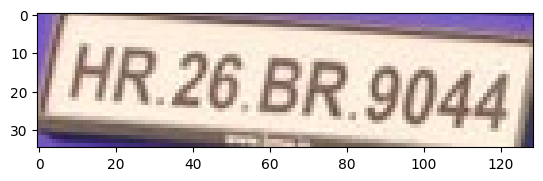

In [30]:
plate_image = cv2.imread('data/example_data/plates/image1.jpg')
plt.imshow(plate_image)

lines is None


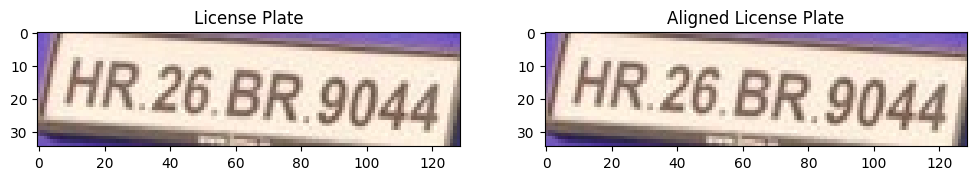

In [31]:
# Assuming 'license_plate_image' is the license plate image
aligned_license_plate = align_license_plate(plate_image)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(plate_image)
axes[0].set_title('License Plate')
        
axes[1].imshow(aligned_license_plate)
axes[1].set_title('Aligned License Plate')

plt.show()

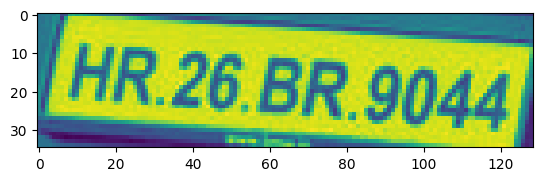

In [32]:
# Convert the license plate image to grayscale
gray_license_plate = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_license_plate)

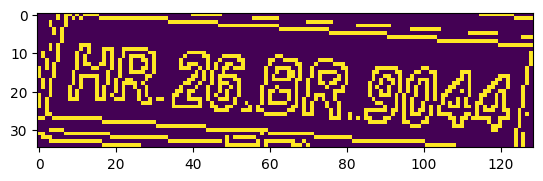

In [33]:
# Perform edge detection
edges = cv2.Canny(gray_license_plate, 50, 150, apertureSize=3)
plt.imshow(edges)

In [34]:
# Find lines in the edge-detected image
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=10, maxLineGap=10)
print(f"lines = {lines}")

lines = None


# Check the function on plate_image obtained during image processing

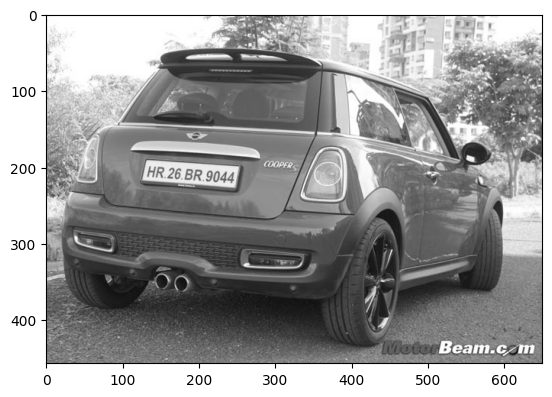

In [35]:
img = cv2.imread('data/example_data/images/image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

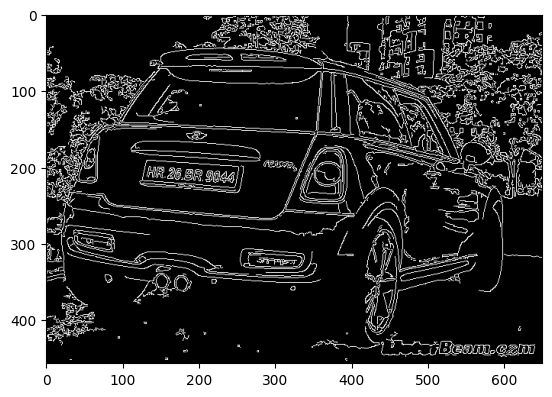

In [36]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) # Noise reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [37]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [38]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

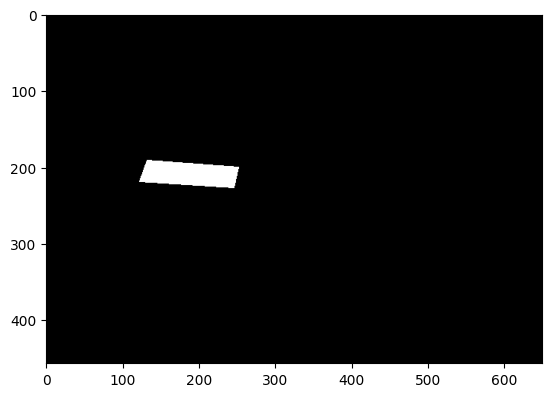

In [39]:
mask = np.zeros(gray.shape, np.uint8) # create a blank mask
new_image = cv2.drawContours(mask, [location], 0, 255, -1) # draw contours inside the mask image with location coordinates
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

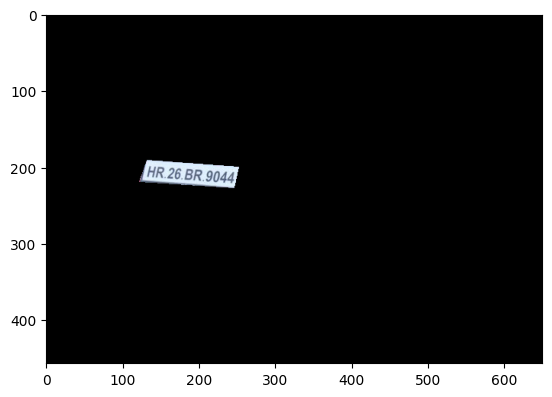

In [40]:
new_image = cv2.bitwise_and(img, img, mask=mask) # Applying masks on top of the original image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

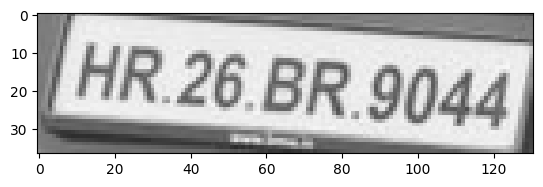

In [41]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2 + 1, y1:y2 + 1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

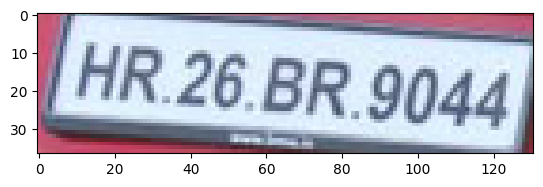

In [42]:
plate_image = img[x1:x2 + 1, y1:y2 + 1].copy()
plt.imshow(cv2.cvtColor(plate_image, cv2.COLOR_BGR2RGB))

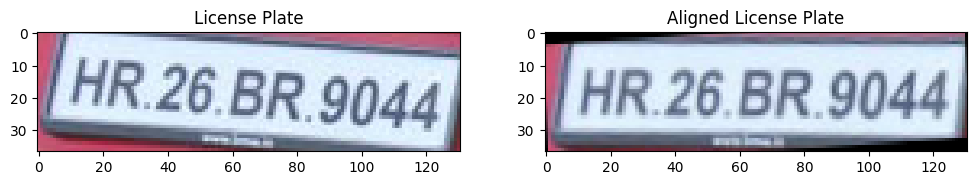

In [44]:
# Assuming 'license_plate_image' is the license plate image
aligned_license_plate = align_license_plate(plate_image)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(plate_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('License Plate')
        
axes[1].imshow(cv2.cvtColor(aligned_license_plate, cv2.COLOR_BGR2RGB))
axes[1].set_title('Aligned License Plate')

plt.show()